Company name :

<img src = 'celebal.webp'/>

## Task -1

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import missingno as mg
from sklearn.metrics import confusion_matrix, classification_report

### 1. Loading the data into memory

In [77]:
data = pd.read_excel('data.xlsx', 'data')

In [232]:
data1 = pd.read_excel('data.xlsx', 'data')

In [78]:
data.describe()

,year,month,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_cc_value_10,odometer_reading,rating_engineTransmission
count,26307.000000,26307.000000,0.0,0.0,26307.000000,26307.000000
mean,2010.856578,5.462006,NaN,NaN,76460.143764,3.624663
std,3.766234,3.583866,NaN,NaN,46762.524489,0.847645
min,1989.000000,1.000000,NaN,NaN,1.000000,0.500000
25%,2008.000000,2.000000,NaN,NaN,46396.000000,3.500000
50%,2011.000000,5.000000,NaN,NaN,72013.000000,4.000000
75%,2014.000000,9.000000,NaN,NaN,98289.500000,4.000000
max,2019.000000,12.000000,NaN,NaN,999999.000000,5.000000


#### Comments :
    1. From the above table we can see that stamdard deviation for the columns 'Odometer_reading'  is too high.
    2. "year" and "month" column has some little amount of skewness 

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   appointmentId                                              26307 non-null  object        
 1   inspectionStartTime                                        26307 non-null  datetime64[ns]
 2   year                                                       26307 non-null  int64         
 3   month                                                      26307 non-null  int64         
 4   engineTransmission_battery_value                           26307 non-null  object        
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object        
 6   engineTransmission_battery_cc_value_1                      430 non-null    object        
 7   engineTransmission_battery_cc_v

#### Comments:
    1. From the above table we can see that the so many columns have missing values. Hence we have to handle this.

### 2. Preparing the data for modeling

### Reading about the data 

There some paramters on which the engine is mainly depending upon i.e 
 1. Battery
 2. Engineoil Dipstick
 3. Engine oil
 4. transmission valve
 5. Coolant
 6. Mounting valve
 7. Gear Shifiting
 8. Clutch
 

#### Hanling missing values

#### Missing values

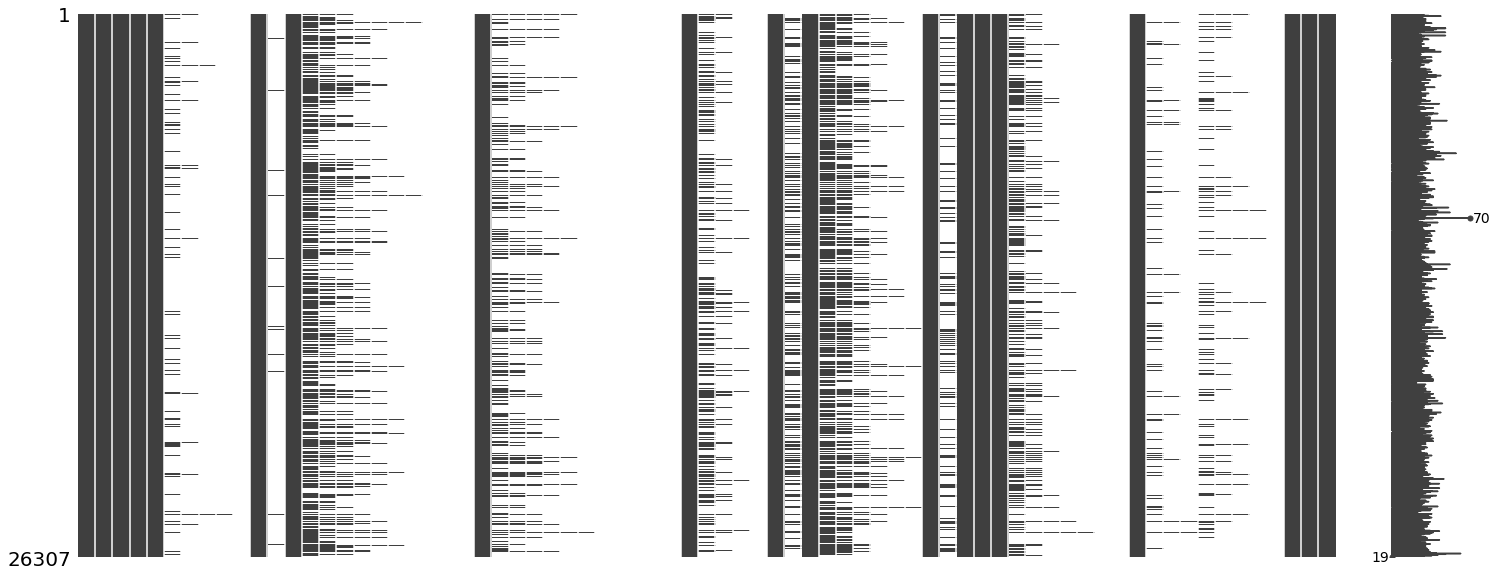

In [80]:
mg.matrix(data)

#### Comments :
 From the above diagram the white spaces represents the missing values and black representts the data

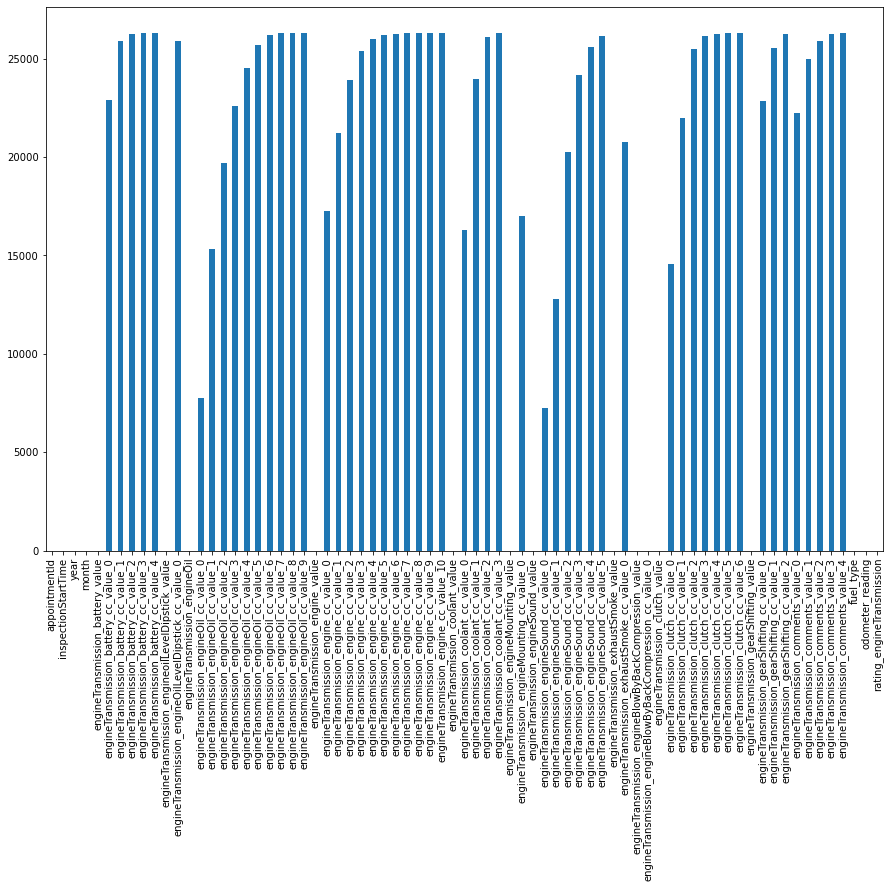

In [81]:
plt.figure(figsize= ((15,10)))
data.isna().sum().plot(kind = 'bar')

#### Handling missing values

In [82]:
data.filter(regex= "battery").sample(5)

,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4
14474,No,Weak,NaN,NaN,NaN,NaN
2647,Yes,NaN,NaN,NaN,NaN,NaN
17216,Yes,NaN,NaN,NaN,NaN,NaN
4043,No,Weak,NaN,NaN,NaN,NaN
7519,No,Weak,Jump Start,NaN,NaN,NaN


In [83]:
data.filter(regex= "coolant").sample(5)

,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3
19941,No,Dirty,NaN,NaN,NaN
22750,Yes,NaN,NaN,NaN,NaN
14669,Yes,NaN,NaN,NaN,NaN
22987,Yes,NaN,NaN,NaN,NaN
6535,No,Dirty,NaN,NaN,NaN


In [84]:
data.filter(regex= "coolant").sample(5)

,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3
10178,No,Leaking,Dirty,NaN,NaN
23886,No,Dirty,NaN,NaN,NaN
17190,No,Dirty,NaN,NaN,NaN
3867,No,Dirty,NaN,NaN,NaN
18407,Yes,NaN,NaN,NaN,NaN


#### Comments :
    1. From the above  filters we can observe that (for filling missing values) if there is any probelm in any engine component listed above the data was "NO" on that Particular column.
    2. If there is 'YES' in the data of that particular component details we can assume that the Component is in very good condition.
    3. Hence we can assume and fill the all the null values with **Good working condtion**

In [85]:
data = data.fillna("Good Condition")

In [86]:
### Checking for null values
data.isna().sum()

appointmentId                          0
inspectionStartTime                    0
year                                   0
month                                  0
engineTransmission_battery_value       0
                                      ..
engineTransmission_comments_value_3    0
engineTransmission_comments_value_4    0
fuel_type                              0
odometer_reading                       0
rating_engineTransmission              0
Length: 73, dtype: int64

### 3. EDA of Variables

Text(0.5, 1.0, 'Distribution of Engine ratings With Respect to year')

<Figure size 720x720 with 0 Axes>

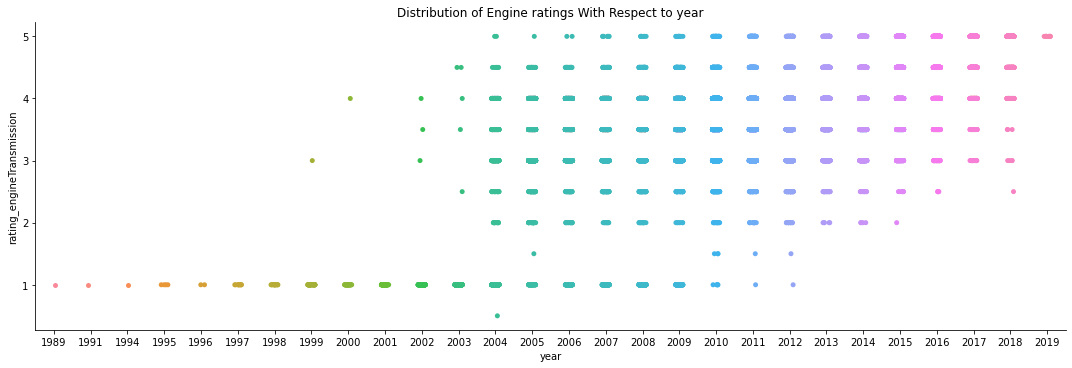

In [87]:
plt.figure(figsize = (10,10))
# sns.scatterplot(x = 'year', y = 'rating_engineTransmission', data = data)
sns.catplot(y= 'rating_engineTransmission', x = 'year', data=data, height=5, aspect=24/8)
plt.title('Distribution of Engine ratings With Respect to year')

Text(0.5, 1.0, 'Distribution of Engine ratings With Respect to month')

<Figure size 720x720 with 0 Axes>

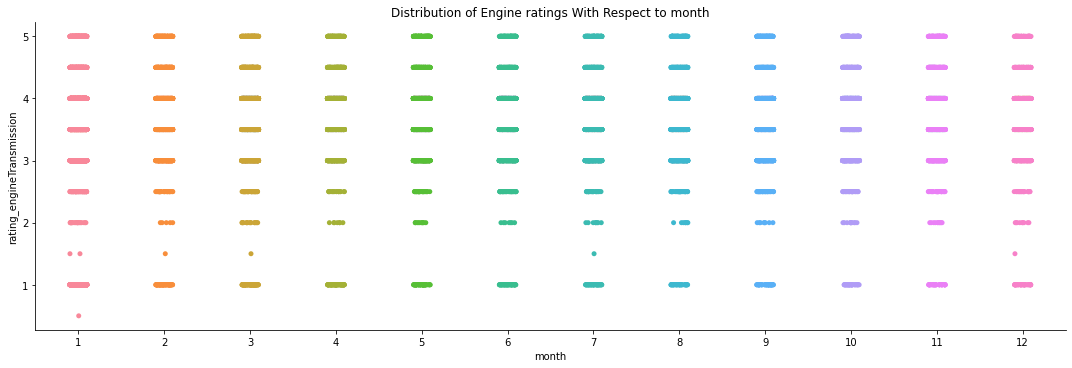

In [88]:
plt.figure(figsize = (10,10))
# sns.scatterplot(x = 'month', y = 'rating_engineTransmission', data = data)
_ = sns.catplot(y = 'rating_engineTransmission', x = 'month', data=data, height=5, aspect=24/8)
plt.title('Distribution of Engine ratings With Respect to month')

##### odometer_reading vs Engine ratings

Text(0.5, 1.0, 'Distribution of Engine ratings With Respect to odometer_reading')

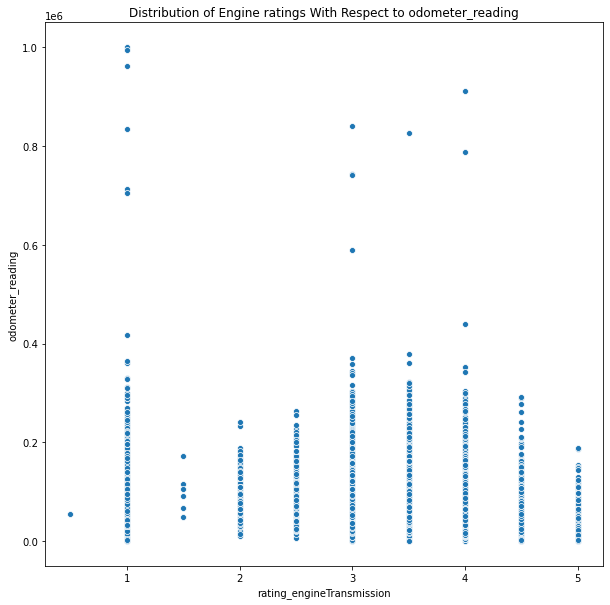

In [89]:
plt.figure(figsize = (10,10))
sns.scatterplot(y = 'odometer_reading', x = 'rating_engineTransmission', data = data)
plt.title('Distribution of Engine ratings With Respect to odometer_reading')

#### Comments : 
    1. From the above scatter plot we can see some of values are out of the range we call them as outliers

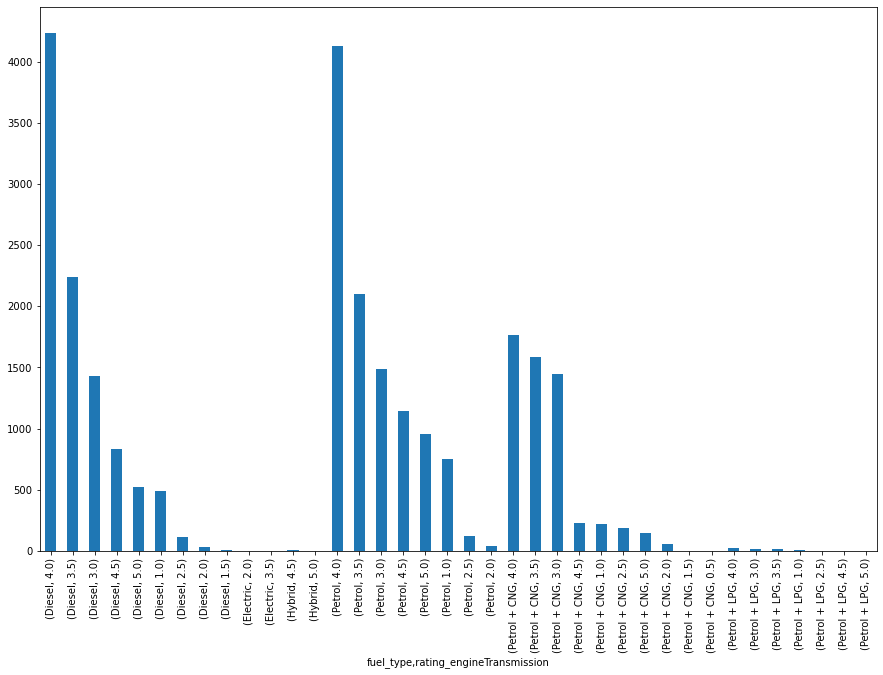

In [90]:
plt.figure(figsize = (15,10))
data.groupby('fuel_type').rating_engineTransmission.value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'No. of Engines on following Fuel type')

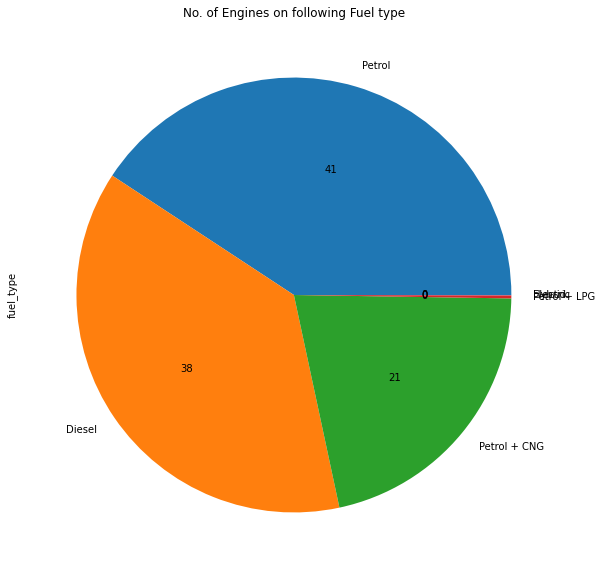

In [91]:
plt.figure(figsize = (15,10))
data.fuel_type.value_counts().reindex().plot(kind = 'pie',  autopct='%.0f')
plt.title('No. of Engines on following Fuel type')

#### Extracting the some of features from the data for analysis and EDA purpose

1. time difference between make_year and inspection
2. Extracting the quater column (whether it belongs to first six months or next).
3. Inspection month column for analysing the in which month engine had more issues and less ratings(Considering the working envirnoment temperture which is not given)


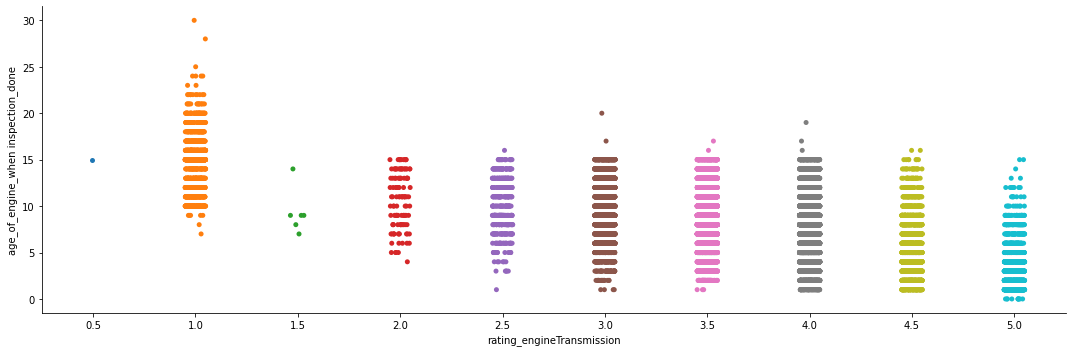

In [96]:
# 1. Time Difference
import datetime
data['year_of_inspection'] = pd.DatetimeIndex(data.inspectionStartTime).year
data['age_of_engine_when inspection_done'] = data.year_of_inspection.astype('int') - data.year.astype('int')
sns.catplot(y = 'age_of_engine_when inspection_done', x = 'rating_engineTransmission', data=data, height=5, aspect=24/8)
# data['age_of_engine_when inspection_done']

#### Comments :
    1. From the above graph we can conclude that the engine having tha age above 20+ years were always given a low ratings

Text(0.5, 0, 'count of no. of inspections')

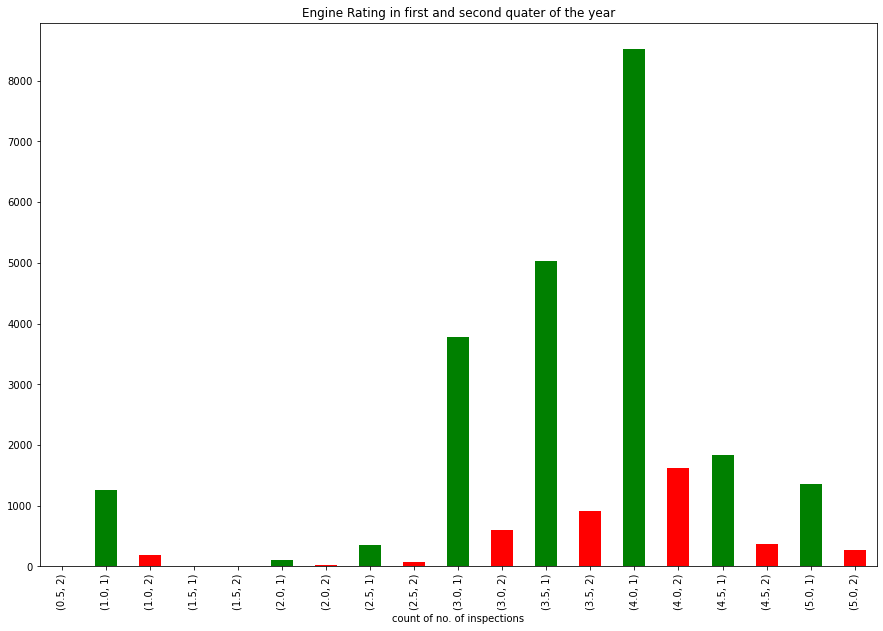

In [97]:
# 2. Quater
data['Quater'] = data.inspectionStartTime.dt.quarter
plt.figure(figsize = (15,10))
m = data.groupby('rating_engineTransmission').Quater.value_counts().plot(kind ='bar', color={"red", "green"})

plt.title('Engine Rating in first and second quater of the year')
plt.xlabel('count of no. of inspections')

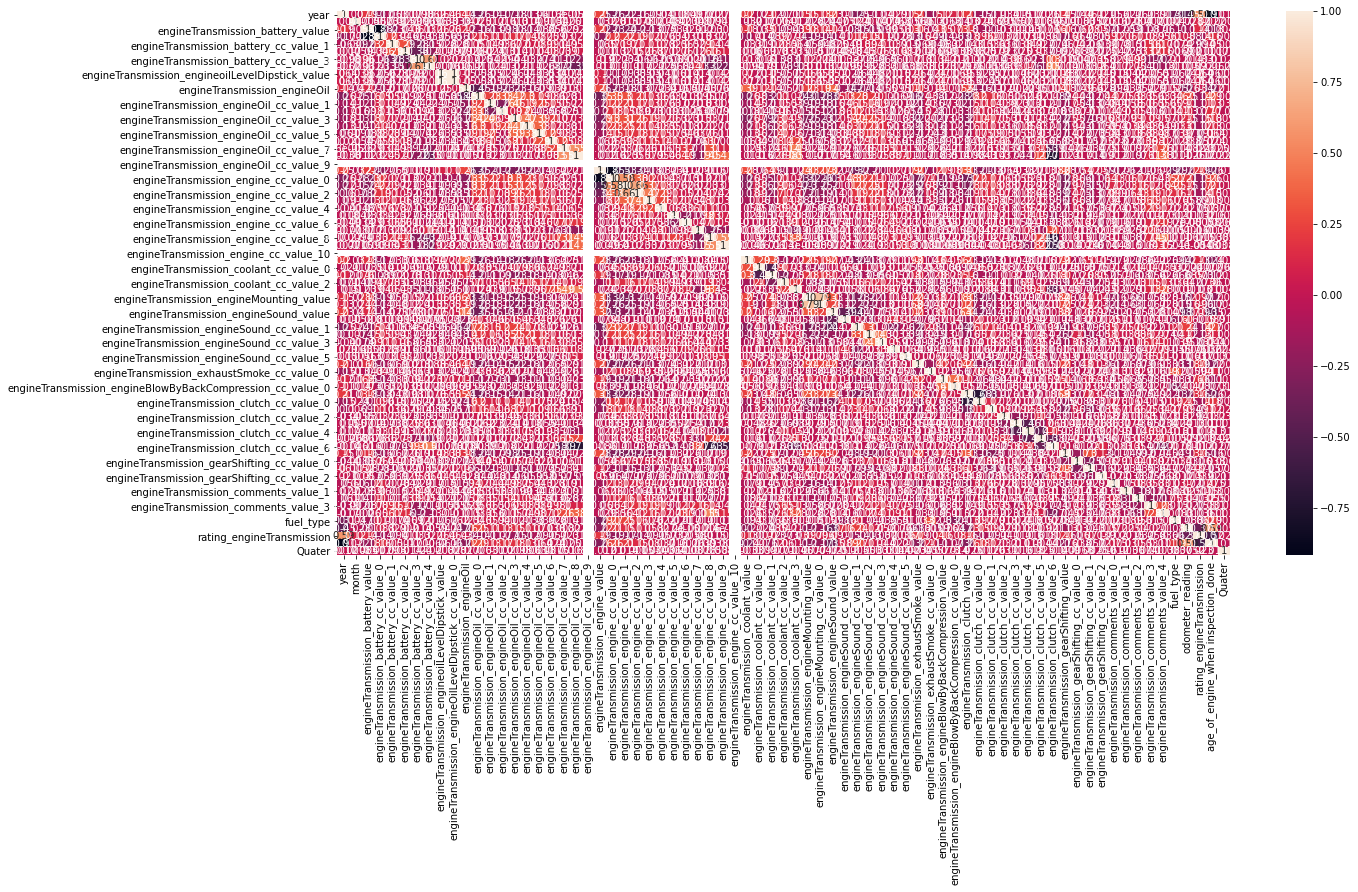

In [234]:
#Corelation heat map
plt.figure(figsize= (20,10))
sns.heatmap(data.corr(), annot= True)

#### comments:
    1. From the above plot we can say that the maximum ratings were given in the first quater of the year and may be next quater the engines number got reduced means ratings also got reduced

#### Reason for taking the Quater into consideration

1. Engine only only depends on the components but also weather conditions, i.e mainly temperature
2. It should be maintained under desired temperature if not problem will occurs
3. Examples There will be starting problems in the snowfall season because of low temperature and In summer engine may fail down or melt due to high temperature





- But in this problem the weather condition is not given, like engine is running inside or outside the envirnoment

#### Preprocessing the data

In [98]:
data 

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission,year_of_inspection,age_of_engine_when inspection_done,Quater
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,Good Condition,Good Condition,Good Condition,Good Condition,...,Starter Motor / Solenoid malfunctioning,Good Condition,Good Condition,Good Condition,Petrol + CNG,124600,3.0,2019,11,1
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,Good Condition,Good Condition,Good Condition,Good Condition,Good Condition,...,Good Condition,Good Condition,Good Condition,Good Condition,Petrol + CNG,78108,4.0,2019,12,1
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,Good Condition,Good Condition,Good Condition,Good Condition,Good Condition,...,Good Condition,Good Condition,Good Condition,Good Condition,Diesel,93348,3.5,2019,7,1
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,Good Condition,Good Condition,Good Condition,Good Condition,Good Condition,...,Good Condition,Good Condition,Good Condition,Good Condition,Petrol + CNG,48233,3.5,2019,6,1
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,Good Condition,Good Condition,Good Condition,Good Condition,Good Condition,...,Good Condition,Good Condition,Good Condition,Good Condition,Petrol + CNG,74368,4.0,2019,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,aj_26303,2019-03-10 13:08:03,2013,3,Yes,Good Condition,Good Condition,Good Condition,Good Condition,Good Condition,...,Good Condition,Good Condition,Good Condition,Good Condition,Petrol + CNG,64532,4.0,2019,6,1
26303,aj_26304,2019-04-12 13:59:02,2007,8,No,Weak,Good Condition,Good Condition,Good Condition,Good Condition,...,Good Condition,Good Condition,Good Condition,Good Condition,Petrol,88051,4.0,2019,12,2
26304,aj_26305,2019-02-28 10:42:53,2004,7,Yes,Good Condition,Good Condition,Good Condition,Good Condition,Good Condition,...,Good Condition,Good Condition,Good Condition,Good Condition,Petrol,22656,3.5,2019,15,1
26305,aj_26306,2019-04-02 12:21:19,2010,12,Yes,Good Condition,Good Condition,Good Condition,Good Condition,Good Condition,...,Good Condition,Good Condition,Good Condition,Good Condition,Diesel,126015,4.5,2019,9,2


In [99]:
data.year.astype('str')
data.drop(columns = ['appointmentId','inspectionStartTime','year_of_inspection'], inplace = True)

In [218]:
data.year = data.year.astype('str')

In [219]:
cat_col = data.select_dtypes(include= 'O')

In [220]:
oe = OrdinalEncoder()

In [221]:
tranformed_data = oe.fit_transform(cat_col)

In [222]:
data[cat_col.columns] = tranformed_data

In [248]:
target_values =  sorted(list(data.rating_engineTransmission.unique()))
target_map = {}
for i, value in enumerate(target_values):
    target_map[value] = i
target_map
    
# target = data.rating_engineTransmission.map(target_map)
    

{0.5: 0,
 1.0: 1,
 1.5: 2,
 2.0: 3,
 2.5: 4,
 3.0: 5,
 3.5: 6,
 4.0: 7,
 4.5: 8,
 5.0: 9}

### With Outliers

### 4. Building the model for training

In [136]:
feature_data = data.drop(columns= ['rating_engineTransmission'])

In [137]:
from sklearn.model_selection import train_test_split

In [139]:
trainX, testX, trainY, testY = train_test_split(feature_data, target)

In [140]:
re = RandomForestClassifier()

In [141]:
re.fit(trainX, trainY)

RandomForestClassifier()

In [142]:
re.score(trainX, trainY)

0.9999493157627978

In [143]:
re.score(testX, testY)

0.5345902387106584

Comments : The model is overfitting

In [146]:
le = LogisticRegression()

In [147]:
le.fit(trainX, trainY)

/home/paramathma/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
le.score(trainX, trainY)

0.394272681196148

In [150]:
le.score(testX, testY)

0.40307130910749583

### Due to some outliers the model is getting overfitted, Trying to detect the outliers by Z score 

In [151]:
data.describe()

,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,...,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission,age_of_engine_when inspection_done,Quater
count,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,...,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.00000
mean,2010.856578,5.462006,0.869312,2.340214,2.014749,2.001064,1.999050,0.999848,0.984377,0.984377,...,3.136542,3.032843,2.020223,0.003877,0.000532,2.089634,76460.143764,3.624663,8.143422,1.15437
std,3.766234,3.583866,0.337065,0.993537,0.167299,0.062260,0.040419,0.012330,0.124015,0.124015,...,0.642803,0.474773,0.234554,0.084449,0.023063,1.667310,46762.524489,0.847645,3.766234,0.36131
min,1989.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,1.00000
25%,2008.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,46396.000000,3.500000,5.000000,1.00000
50%,2011.000000,5.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,0.000000,0.000000,3.000000,72013.000000,4.000000,8.000000,1.00000
75%,2014.000000,9.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,0.000000,0.000000,3.000000,98289.500000,4.000000,11.000000,1.00000
max,2019.000000,12.000000,1.000000,5.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,4.000000,2.000000,1.000000,5.000000,999999.000000,5.000000,30.000000,2.00000


#### Outliers visualization

In [ ]:
### Taking huge time run this code (visualization of outliers with boxplots)
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y= 'odometer_reading', x  ='rating_engineTransmission', data = data )
sns.swarmplot(y= 'odometer_reading', x  ='rating_engineTransmission', data = data )

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y= 'odometer_reading', data = data )
sns.swarmplot(y= 'odometer_reading', data = data )

### Method : 1 Interquartile Range

In [154]:
quar1, quar3 =  np.percentile(data, [25,75])
# Finding the IQR
iqr  = quar3 - quar1
# Finding the lower and higer bound 
higher = quar3+(1.5*iqr)
lower = quar1-(1.5*iqr)

data_new = data.loc[(lower < data.values) & (higher > data.values)]

In [162]:
feature_data = data_new.drop(columns= ['rating_engineTransmission'])
target_values =  sorted(list(data.rating_engineTransmission.unique()))
target_map = {}
for i, value in enumerate(target_values):
    target_map[value] = i
    
target = data_new.rating_engineTransmission.map(target_map)
    

In [163]:
trainX, testX, trainY, testY = train_test_split(feature_data, target)

In [164]:
re.fit(trainX, trainY)

RandomForestClassifier()

In [165]:
re.score(testX, testY)

0.9999596084714499

In [166]:
re.score(trainX, trainY)

0.9999626004085531

In [167]:
from sklearn.metrics import classification_report

In [169]:
print(classification_report(testY, re.predict(testX)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00     25134
           2       1.00      1.00      1.00       111
           3       1.00      1.00      1.00      1843
           4       1.00      1.00      1.00      6781
           5       1.00      1.00      1.00     72548
           6       1.00      1.00      1.00     99962
           7       1.00      1.00      1.00    172805
           8       1.00      1.00      1.00     38270
           9       1.00      1.00      1.00     28165

    accuracy                           1.00    445638
   macro avg       1.00      1.00      1.00    445638
weighted avg       1.00      1.00      1.00    445638



### Method :2 Z- score  (Outlier Handling)

### List of index in which outliers are present

In [186]:
outliers = []
def detect_outliers(data):
    thresold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z = (i-mean)/std
        if thresold < z:
            outliers.append(i)
    return outliers

In [188]:
outliers_iindex = detect_outliers(data.odometer_reading)

In [208]:
#### This are the list of outliers present in the data
len(outliers_iindex)

472

In [209]:
for value in outliers_iindex:
    removing_values = data[data.odometer_reading == value].index
    data.drop(removing_values , inplace=True)
        

#### Since some of the numerical columns are not normally distributed, Hence we will do log transformation for those colummns

In [228]:
data.describe()
num_cols =['age_of_engine_when inspection_done','odometer_reading']

In [231]:
# Logtransformation
for col in num_cols:
    data[col] = np.log1p(data[col])

In [237]:
feature = data.drop(columns = ['odometer_reading'])
# target = data.odometer_reading

In [250]:
len(target)

26071

In [249]:

    
target = data.rating_engineTransmission.map(target_map)

In [270]:
trainX,testX, trainY, testY= train_test_split(feature, target)

#### Going forward for hyper parameter tuning

In [271]:
from catboost import CatBoostClassifier

In [272]:
clf = CatBoostClassifier(n_estimators = 3000,
                       learning_rate = 0.01,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2054,
                       )
clf.fit(trainX, trainY)

0:	learn: 2.2290079	total: 112ms	remaining: 5m 36s
1:	learn: 2.1515155	total: 161ms	remaining: 4m 1s
2:	learn: 2.1113390	total: 206ms	remaining: 3m 25s
3:	learn: 2.0627765	total: 251ms	remaining: 3m 8s
4:	learn: 2.0420608	total: 295ms	remaining: 2m 56s
5:	learn: 1.9881857	total: 344ms	remaining: 2m 51s
6:	learn: 1.9439820	total: 391ms	remaining: 2m 46s
7:	learn: 1.8913099	total: 433ms	remaining: 2m 41s
8:	learn: 1.8419343	total: 480ms	remaining: 2m 39s
9:	learn: 1.7913214	total: 524ms	remaining: 2m 36s
10:	learn: 1.7560786	total: 580ms	remaining: 2m 37s
11:	learn: 1.7163398	total: 625ms	remaining: 2m 35s
12:	learn: 1.6780063	total: 668ms	remaining: 2m 33s
13:	learn: 1.6535297	total: 713ms	remaining: 2m 32s
14:	learn: 1.6384516	total: 760ms	remaining: 2m 31s
15:	learn: 1.6100472	total: 808ms	remaining: 2m 30s
16:	learn: 1.5827392	total: 858ms	remaining: 2m 30s
17:	learn: 1.5479792	total: 904ms	remaining: 2m 29s
18:	learn: 1.5178250	total: 949ms	remaining: 2m 28s
19:	learn: 1.4888511	tot

159:	learn: 0.3522190	total: 7.58s	remaining: 2m 14s
160:	learn: 0.3486162	total: 7.64s	remaining: 2m 14s
161:	learn: 0.3447424	total: 7.68s	remaining: 2m 14s
162:	learn: 0.3417935	total: 7.73s	remaining: 2m 14s
163:	learn: 0.3392357	total: 7.78s	remaining: 2m 14s
164:	learn: 0.3369987	total: 7.84s	remaining: 2m 14s
165:	learn: 0.3344500	total: 7.89s	remaining: 2m 14s
166:	learn: 0.3314123	total: 7.93s	remaining: 2m 14s
167:	learn: 0.3283496	total: 7.98s	remaining: 2m 14s
168:	learn: 0.3259519	total: 8.03s	remaining: 2m 14s
169:	learn: 0.3233371	total: 8.09s	remaining: 2m 14s
170:	learn: 0.3207845	total: 8.13s	remaining: 2m 14s
171:	learn: 0.3179133	total: 8.17s	remaining: 2m 14s
172:	learn: 0.3154320	total: 8.21s	remaining: 2m 14s
173:	learn: 0.3133761	total: 8.25s	remaining: 2m 14s
174:	learn: 0.3099744	total: 8.3s	remaining: 2m 13s
175:	learn: 0.3077202	total: 8.34s	remaining: 2m 13s
176:	learn: 0.3065708	total: 8.38s	remaining: 2m 13s
177:	learn: 0.3036197	total: 8.43s	remaining: 2

316:	learn: 0.1257480	total: 15.3s	remaining: 2m 9s
317:	learn: 0.1251916	total: 15.4s	remaining: 2m 9s
318:	learn: 0.1246821	total: 15.4s	remaining: 2m 9s
319:	learn: 0.1242808	total: 15.5s	remaining: 2m 9s
320:	learn: 0.1232544	total: 15.5s	remaining: 2m 9s
321:	learn: 0.1225721	total: 15.6s	remaining: 2m 9s
322:	learn: 0.1217291	total: 15.6s	remaining: 2m 9s
323:	learn: 0.1212088	total: 15.6s	remaining: 2m 9s
324:	learn: 0.1202580	total: 15.7s	remaining: 2m 9s
325:	learn: 0.1195738	total: 15.7s	remaining: 2m 9s
326:	learn: 0.1192017	total: 15.8s	remaining: 2m 8s
327:	learn: 0.1186521	total: 15.8s	remaining: 2m 8s
328:	learn: 0.1184357	total: 15.9s	remaining: 2m 8s
329:	learn: 0.1179054	total: 15.9s	remaining: 2m 8s
330:	learn: 0.1173952	total: 16s	remaining: 2m 8s
331:	learn: 0.1168674	total: 16s	remaining: 2m 8s
332:	learn: 0.1161165	total: 16.1s	remaining: 2m 8s
333:	learn: 0.1156224	total: 16.1s	remaining: 2m 8s
334:	learn: 0.1149125	total: 16.1s	remaining: 2m 8s
335:	learn: 0.11

479:	learn: 0.0588023	total: 22.8s	remaining: 1m 59s
480:	learn: 0.0583712	total: 22.9s	remaining: 1m 59s
481:	learn: 0.0579857	total: 22.9s	remaining: 1m 59s
482:	learn: 0.0578149	total: 23s	remaining: 1m 59s
483:	learn: 0.0574066	total: 23s	remaining: 1m 59s
484:	learn: 0.0571649	total: 23s	remaining: 1m 59s
485:	learn: 0.0568780	total: 23.1s	remaining: 1m 59s
486:	learn: 0.0567655	total: 23.1s	remaining: 1m 59s
487:	learn: 0.0565293	total: 23.2s	remaining: 1m 59s
488:	learn: 0.0562719	total: 23.2s	remaining: 1m 59s
489:	learn: 0.0560557	total: 23.3s	remaining: 1m 59s
490:	learn: 0.0557323	total: 23.3s	remaining: 1m 59s
491:	learn: 0.0556119	total: 23.3s	remaining: 1m 59s
492:	learn: 0.0551244	total: 23.4s	remaining: 1m 58s
493:	learn: 0.0550262	total: 23.4s	remaining: 1m 58s
494:	learn: 0.0546268	total: 23.5s	remaining: 1m 58s
495:	learn: 0.0543594	total: 23.5s	remaining: 1m 58s
496:	learn: 0.0541744	total: 23.6s	remaining: 1m 58s
497:	learn: 0.0541383	total: 23.6s	remaining: 1m 58s

635:	learn: 0.0330496	total: 30s	remaining: 1m 51s
636:	learn: 0.0329525	total: 30.1s	remaining: 1m 51s
637:	learn: 0.0329443	total: 30.1s	remaining: 1m 51s
638:	learn: 0.0328902	total: 30.2s	remaining: 1m 51s
639:	learn: 0.0328180	total: 30.2s	remaining: 1m 51s
640:	learn: 0.0327520	total: 30.2s	remaining: 1m 51s
641:	learn: 0.0326649	total: 30.3s	remaining: 1m 51s
642:	learn: 0.0324683	total: 30.3s	remaining: 1m 51s
643:	learn: 0.0323636	total: 30.4s	remaining: 1m 51s
644:	learn: 0.0322953	total: 30.4s	remaining: 1m 51s
645:	learn: 0.0322846	total: 30.5s	remaining: 1m 51s
646:	learn: 0.0322120	total: 30.5s	remaining: 1m 50s
647:	learn: 0.0321546	total: 30.6s	remaining: 1m 50s
648:	learn: 0.0319495	total: 30.6s	remaining: 1m 50s
649:	learn: 0.0318531	total: 30.6s	remaining: 1m 50s
650:	learn: 0.0317050	total: 30.7s	remaining: 1m 50s
651:	learn: 0.0315892	total: 30.7s	remaining: 1m 50s
652:	learn: 0.0315040	total: 30.8s	remaining: 1m 50s
653:	learn: 0.0313861	total: 30.8s	remaining: 1m

794:	learn: 0.0215074	total: 37.1s	remaining: 1m 43s
795:	learn: 0.0213174	total: 37.2s	remaining: 1m 42s
796:	learn: 0.0213121	total: 37.2s	remaining: 1m 42s
797:	learn: 0.0211950	total: 37.3s	remaining: 1m 42s
798:	learn: 0.0211918	total: 37.3s	remaining: 1m 42s
799:	learn: 0.0211720	total: 37.4s	remaining: 1m 42s
800:	learn: 0.0211186	total: 37.4s	remaining: 1m 42s
801:	learn: 0.0210064	total: 37.4s	remaining: 1m 42s
802:	learn: 0.0208642	total: 37.5s	remaining: 1m 42s
803:	learn: 0.0208354	total: 37.5s	remaining: 1m 42s
804:	learn: 0.0208181	total: 37.6s	remaining: 1m 42s
805:	learn: 0.0208019	total: 37.6s	remaining: 1m 42s
806:	learn: 0.0207992	total: 37.7s	remaining: 1m 42s
807:	learn: 0.0207047	total: 37.7s	remaining: 1m 42s
808:	learn: 0.0206798	total: 37.7s	remaining: 1m 42s
809:	learn: 0.0206405	total: 37.8s	remaining: 1m 42s
810:	learn: 0.0206148	total: 37.8s	remaining: 1m 42s
811:	learn: 0.0205762	total: 37.9s	remaining: 1m 42s
812:	learn: 0.0205726	total: 37.9s	remaining: 

951:	learn: 0.0163831	total: 44.1s	remaining: 1m 34s
952:	learn: 0.0163721	total: 44.1s	remaining: 1m 34s
953:	learn: 0.0163413	total: 44.2s	remaining: 1m 34s
954:	learn: 0.0163062	total: 44.2s	remaining: 1m 34s
955:	learn: 0.0162950	total: 44.3s	remaining: 1m 34s
956:	learn: 0.0162938	total: 44.3s	remaining: 1m 34s
957:	learn: 0.0162219	total: 44.3s	remaining: 1m 34s
958:	learn: 0.0161130	total: 44.4s	remaining: 1m 34s
959:	learn: 0.0160828	total: 44.4s	remaining: 1m 34s
960:	learn: 0.0159556	total: 44.5s	remaining: 1m 34s
961:	learn: 0.0158998	total: 44.5s	remaining: 1m 34s
962:	learn: 0.0158991	total: 44.6s	remaining: 1m 34s
963:	learn: 0.0157764	total: 44.6s	remaining: 1m 34s
964:	learn: 0.0157753	total: 44.7s	remaining: 1m 34s
965:	learn: 0.0157732	total: 44.7s	remaining: 1m 34s
966:	learn: 0.0157587	total: 44.7s	remaining: 1m 34s
967:	learn: 0.0157283	total: 44.8s	remaining: 1m 34s
968:	learn: 0.0157271	total: 44.8s	remaining: 1m 33s
969:	learn: 0.0157154	total: 44.9s	remaining: 

1108:	learn: 0.0138546	total: 50.9s	remaining: 1m 26s
1109:	learn: 0.0138534	total: 50.9s	remaining: 1m 26s
1110:	learn: 0.0138529	total: 51s	remaining: 1m 26s
1111:	learn: 0.0138524	total: 51s	remaining: 1m 26s
1112:	learn: 0.0138505	total: 51.1s	remaining: 1m 26s
1113:	learn: 0.0138488	total: 51.1s	remaining: 1m 26s
1114:	learn: 0.0138483	total: 51.2s	remaining: 1m 26s
1115:	learn: 0.0138461	total: 51.2s	remaining: 1m 26s
1116:	learn: 0.0138456	total: 51.2s	remaining: 1m 26s
1117:	learn: 0.0138439	total: 51.3s	remaining: 1m 26s
1118:	learn: 0.0138431	total: 51.3s	remaining: 1m 26s
1119:	learn: 0.0137862	total: 51.4s	remaining: 1m 26s
1120:	learn: 0.0137603	total: 51.4s	remaining: 1m 26s
1121:	learn: 0.0137475	total: 51.4s	remaining: 1m 26s
1122:	learn: 0.0137321	total: 51.5s	remaining: 1m 26s
1123:	learn: 0.0137312	total: 51.5s	remaining: 1m 25s
1124:	learn: 0.0136972	total: 51.6s	remaining: 1m 25s
1125:	learn: 0.0136959	total: 51.6s	remaining: 1m 25s
1126:	learn: 0.0136953	total: 51

1265:	learn: 0.0120686	total: 57.4s	remaining: 1m 18s
1266:	learn: 0.0120677	total: 57.5s	remaining: 1m 18s
1267:	learn: 0.0120669	total: 57.5s	remaining: 1m 18s
1268:	learn: 0.0120652	total: 57.6s	remaining: 1m 18s
1269:	learn: 0.0120635	total: 57.6s	remaining: 1m 18s
1270:	learn: 0.0120626	total: 57.6s	remaining: 1m 18s
1271:	learn: 0.0120612	total: 57.7s	remaining: 1m 18s
1272:	learn: 0.0120608	total: 57.7s	remaining: 1m 18s
1273:	learn: 0.0120604	total: 57.8s	remaining: 1m 18s
1274:	learn: 0.0120600	total: 57.8s	remaining: 1m 18s
1275:	learn: 0.0120589	total: 57.8s	remaining: 1m 18s
1276:	learn: 0.0120578	total: 57.9s	remaining: 1m 18s
1277:	learn: 0.0120523	total: 57.9s	remaining: 1m 18s
1278:	learn: 0.0120509	total: 58s	remaining: 1m 18s
1279:	learn: 0.0120447	total: 58s	remaining: 1m 17s
1280:	learn: 0.0120440	total: 58.1s	remaining: 1m 17s
1281:	learn: 0.0120324	total: 58.1s	remaining: 1m 17s
1282:	learn: 0.0120319	total: 58.1s	remaining: 1m 17s
1283:	learn: 0.0120308	total: 58

1422:	learn: 0.0107925	total: 1m 4s	remaining: 1m 11s
1423:	learn: 0.0107918	total: 1m 4s	remaining: 1m 11s
1424:	learn: 0.0107500	total: 1m 4s	remaining: 1m 10s
1425:	learn: 0.0107493	total: 1m 4s	remaining: 1m 10s
1426:	learn: 0.0107484	total: 1m 4s	remaining: 1m 10s
1427:	learn: 0.0107473	total: 1m 4s	remaining: 1m 10s
1428:	learn: 0.0107461	total: 1m 4s	remaining: 1m 10s
1429:	learn: 0.0107241	total: 1m 4s	remaining: 1m 10s
1430:	learn: 0.0107237	total: 1m 4s	remaining: 1m 10s
1431:	learn: 0.0107225	total: 1m 4s	remaining: 1m 10s
1432:	learn: 0.0107219	total: 1m 4s	remaining: 1m 10s
1433:	learn: 0.0107092	total: 1m 4s	remaining: 1m 10s
1434:	learn: 0.0107089	total: 1m 4s	remaining: 1m 10s
1435:	learn: 0.0107075	total: 1m 4s	remaining: 1m 10s
1436:	learn: 0.0107070	total: 1m 4s	remaining: 1m 10s
1437:	learn: 0.0107061	total: 1m 4s	remaining: 1m 10s
1438:	learn: 0.0107055	total: 1m 4s	remaining: 1m 10s
1439:	learn: 0.0107050	total: 1m 4s	remaining: 1m 10s
1440:	learn: 0.0106772	total

1577:	learn: 0.0097834	total: 1m 10s	remaining: 1m 3s
1578:	learn: 0.0097829	total: 1m 10s	remaining: 1m 3s
1579:	learn: 0.0097821	total: 1m 10s	remaining: 1m 3s
1580:	learn: 0.0097604	total: 1m 10s	remaining: 1m 3s
1581:	learn: 0.0097599	total: 1m 10s	remaining: 1m 3s
1582:	learn: 0.0097590	total: 1m 11s	remaining: 1m 3s
1583:	learn: 0.0097584	total: 1m 11s	remaining: 1m 3s
1584:	learn: 0.0097578	total: 1m 11s	remaining: 1m 3s
1585:	learn: 0.0097357	total: 1m 11s	remaining: 1m 3s
1586:	learn: 0.0097349	total: 1m 11s	remaining: 1m 3s
1587:	learn: 0.0097341	total: 1m 11s	remaining: 1m 3s
1588:	learn: 0.0097005	total: 1m 11s	remaining: 1m 3s
1589:	learn: 0.0097002	total: 1m 11s	remaining: 1m 3s
1590:	learn: 0.0096995	total: 1m 11s	remaining: 1m 3s
1591:	learn: 0.0096989	total: 1m 11s	remaining: 1m 3s
1592:	learn: 0.0096888	total: 1m 11s	remaining: 1m 3s
1593:	learn: 0.0096885	total: 1m 11s	remaining: 1m 3s
1594:	learn: 0.0096601	total: 1m 11s	remaining: 1m 3s
1595:	learn: 0.0096550	total

1732:	learn: 0.0089594	total: 1m 17s	remaining: 56.6s
1733:	learn: 0.0089509	total: 1m 17s	remaining: 56.6s
1734:	learn: 0.0089505	total: 1m 17s	remaining: 56.5s
1735:	learn: 0.0089498	total: 1m 17s	remaining: 56.5s
1736:	learn: 0.0089458	total: 1m 17s	remaining: 56.4s
1737:	learn: 0.0089454	total: 1m 17s	remaining: 56.4s
1738:	learn: 0.0089446	total: 1m 17s	remaining: 56.4s
1739:	learn: 0.0089444	total: 1m 17s	remaining: 56.3s
1740:	learn: 0.0089441	total: 1m 17s	remaining: 56.3s
1741:	learn: 0.0089436	total: 1m 17s	remaining: 56.2s
1742:	learn: 0.0089432	total: 1m 17s	remaining: 56.2s
1743:	learn: 0.0089427	total: 1m 17s	remaining: 56.1s
1744:	learn: 0.0089421	total: 1m 17s	remaining: 56.1s
1745:	learn: 0.0089194	total: 1m 18s	remaining: 56s
1746:	learn: 0.0089187	total: 1m 18s	remaining: 56s
1747:	learn: 0.0089184	total: 1m 18s	remaining: 55.9s
1748:	learn: 0.0089177	total: 1m 18s	remaining: 55.9s
1749:	learn: 0.0089170	total: 1m 18s	remaining: 55.9s
1750:	learn: 0.0088973	total: 1m

1889:	learn: 0.0080135	total: 1m 24s	remaining: 49.5s
1890:	learn: 0.0079976	total: 1m 24s	remaining: 49.4s
1891:	learn: 0.0079936	total: 1m 24s	remaining: 49.4s
1892:	learn: 0.0079934	total: 1m 24s	remaining: 49.3s
1893:	learn: 0.0079932	total: 1m 24s	remaining: 49.3s
1894:	learn: 0.0079926	total: 1m 24s	remaining: 49.3s
1895:	learn: 0.0079865	total: 1m 24s	remaining: 49.2s
1896:	learn: 0.0079859	total: 1m 24s	remaining: 49.2s
1897:	learn: 0.0079854	total: 1m 24s	remaining: 49.1s
1898:	learn: 0.0079849	total: 1m 24s	remaining: 49.1s
1899:	learn: 0.0079708	total: 1m 24s	remaining: 49s
1900:	learn: 0.0079705	total: 1m 24s	remaining: 49s
1901:	learn: 0.0079700	total: 1m 24s	remaining: 48.9s
1902:	learn: 0.0079694	total: 1m 24s	remaining: 48.9s
1903:	learn: 0.0079688	total: 1m 24s	remaining: 48.8s
1904:	learn: 0.0079680	total: 1m 24s	remaining: 48.8s
1905:	learn: 0.0079674	total: 1m 24s	remaining: 48.7s
1906:	learn: 0.0079178	total: 1m 24s	remaining: 48.7s
1907:	learn: 0.0079176	total: 1m

2042:	learn: 0.0072239	total: 1m 30s	remaining: 42.5s
2043:	learn: 0.0072237	total: 1m 30s	remaining: 42.5s
2044:	learn: 0.0072235	total: 1m 30s	remaining: 42.5s
2045:	learn: 0.0072232	total: 1m 30s	remaining: 42.4s
2046:	learn: 0.0072231	total: 1m 30s	remaining: 42.4s
2047:	learn: 0.0072226	total: 1m 31s	remaining: 42.3s
2048:	learn: 0.0072220	total: 1m 31s	remaining: 42.3s
2049:	learn: 0.0072217	total: 1m 31s	remaining: 42.2s
2050:	learn: 0.0071851	total: 1m 31s	remaining: 42.2s
2051:	learn: 0.0071733	total: 1m 31s	remaining: 42.1s
2052:	learn: 0.0071708	total: 1m 31s	remaining: 42.1s
2053:	learn: 0.0071704	total: 1m 31s	remaining: 42.1s
2054:	learn: 0.0071700	total: 1m 31s	remaining: 42s
2055:	learn: 0.0071697	total: 1m 31s	remaining: 42s
2056:	learn: 0.0071693	total: 1m 31s	remaining: 41.9s
2057:	learn: 0.0071588	total: 1m 31s	remaining: 41.9s
2058:	learn: 0.0071510	total: 1m 31s	remaining: 41.8s
2059:	learn: 0.0071384	total: 1m 31s	remaining: 41.8s
2060:	learn: 0.0071359	total: 1m

2199:	learn: 0.0066653	total: 1m 37s	remaining: 35.5s
2200:	learn: 0.0066651	total: 1m 37s	remaining: 35.4s
2201:	learn: 0.0066586	total: 1m 37s	remaining: 35.4s
2202:	learn: 0.0066583	total: 1m 37s	remaining: 35.4s
2203:	learn: 0.0066579	total: 1m 37s	remaining: 35.3s
2204:	learn: 0.0066464	total: 1m 37s	remaining: 35.3s
2205:	learn: 0.0066463	total: 1m 37s	remaining: 35.2s
2206:	learn: 0.0066079	total: 1m 37s	remaining: 35.2s
2207:	learn: 0.0066078	total: 1m 37s	remaining: 35.1s
2208:	learn: 0.0066075	total: 1m 37s	remaining: 35.1s
2209:	learn: 0.0066070	total: 1m 38s	remaining: 35s
2210:	learn: 0.0066066	total: 1m 38s	remaining: 35s
2211:	learn: 0.0066022	total: 1m 38s	remaining: 35s
2212:	learn: 0.0065751	total: 1m 38s	remaining: 34.9s
2213:	learn: 0.0065748	total: 1m 38s	remaining: 34.9s
2214:	learn: 0.0065746	total: 1m 38s	remaining: 34.8s
2215:	learn: 0.0065740	total: 1m 38s	remaining: 34.8s
2216:	learn: 0.0065737	total: 1m 38s	remaining: 34.7s
2217:	learn: 0.0065734	total: 1m 3

2356:	learn: 0.0058245	total: 1m 44s	remaining: 28.5s
2357:	learn: 0.0058243	total: 1m 44s	remaining: 28.4s
2358:	learn: 0.0058240	total: 1m 44s	remaining: 28.4s
2359:	learn: 0.0058237	total: 1m 44s	remaining: 28.3s
2360:	learn: 0.0058233	total: 1m 44s	remaining: 28.3s
2361:	learn: 0.0058135	total: 1m 44s	remaining: 28.3s
2362:	learn: 0.0058131	total: 1m 44s	remaining: 28.2s
2363:	learn: 0.0058128	total: 1m 44s	remaining: 28.2s
2364:	learn: 0.0057928	total: 1m 44s	remaining: 28.1s
2365:	learn: 0.0057926	total: 1m 44s	remaining: 28.1s
2366:	learn: 0.0057922	total: 1m 44s	remaining: 28s
2367:	learn: 0.0057918	total: 1m 44s	remaining: 28s
2368:	learn: 0.0057915	total: 1m 44s	remaining: 27.9s
2369:	learn: 0.0057914	total: 1m 44s	remaining: 27.9s
2370:	learn: 0.0057614	total: 1m 44s	remaining: 27.9s
2371:	learn: 0.0057613	total: 1m 45s	remaining: 27.8s
2372:	learn: 0.0057548	total: 1m 45s	remaining: 27.8s
2373:	learn: 0.0057543	total: 1m 45s	remaining: 27.7s
2374:	learn: 0.0057240	total: 1m

2509:	learn: 0.0053486	total: 1m 51s	remaining: 21.7s
2510:	learn: 0.0053484	total: 1m 51s	remaining: 21.7s
2511:	learn: 0.0053299	total: 1m 51s	remaining: 21.6s
2512:	learn: 0.0053260	total: 1m 51s	remaining: 21.6s
2513:	learn: 0.0053257	total: 1m 51s	remaining: 21.5s
2514:	learn: 0.0053255	total: 1m 51s	remaining: 21.5s
2515:	learn: 0.0053253	total: 1m 51s	remaining: 21.4s
2516:	learn: 0.0053050	total: 1m 51s	remaining: 21.4s
2517:	learn: 0.0053048	total: 1m 51s	remaining: 21.3s
2518:	learn: 0.0052929	total: 1m 51s	remaining: 21.3s
2519:	learn: 0.0052927	total: 1m 51s	remaining: 21.3s
2520:	learn: 0.0052625	total: 1m 51s	remaining: 21.2s
2521:	learn: 0.0052624	total: 1m 51s	remaining: 21.2s
2522:	learn: 0.0052603	total: 1m 51s	remaining: 21.1s
2523:	learn: 0.0052601	total: 1m 51s	remaining: 21.1s
2524:	learn: 0.0052571	total: 1m 51s	remaining: 21s
2525:	learn: 0.0052551	total: 1m 51s	remaining: 21s
2526:	learn: 0.0052549	total: 1m 51s	remaining: 20.9s
2527:	learn: 0.0052547	total: 1m

2665:	learn: 0.0047900	total: 1m 57s	remaining: 14.8s
2666:	learn: 0.0047899	total: 1m 57s	remaining: 14.7s
2667:	learn: 0.0047863	total: 1m 57s	remaining: 14.7s
2668:	learn: 0.0047860	total: 1m 58s	remaining: 14.6s
2669:	learn: 0.0047859	total: 1m 58s	remaining: 14.6s
2670:	learn: 0.0047857	total: 1m 58s	remaining: 14.5s
2671:	learn: 0.0047757	total: 1m 58s	remaining: 14.5s
2672:	learn: 0.0047611	total: 1m 58s	remaining: 14.5s
2673:	learn: 0.0047609	total: 1m 58s	remaining: 14.4s
2674:	learn: 0.0047607	total: 1m 58s	remaining: 14.4s
2675:	learn: 0.0047576	total: 1m 58s	remaining: 14.3s
2676:	learn: 0.0047574	total: 1m 58s	remaining: 14.3s
2677:	learn: 0.0047396	total: 1m 58s	remaining: 14.2s
2678:	learn: 0.0047251	total: 1m 58s	remaining: 14.2s
2679:	learn: 0.0047215	total: 1m 58s	remaining: 14.1s
2680:	learn: 0.0047178	total: 1m 58s	remaining: 14.1s
2681:	learn: 0.0047176	total: 1m 58s	remaining: 14.1s
2682:	learn: 0.0047175	total: 1m 58s	remaining: 14s
2683:	learn: 0.0047175	total: 

2823:	learn: 0.0043349	total: 2m 4s	remaining: 7.77s
2824:	learn: 0.0043348	total: 2m 4s	remaining: 7.72s
2825:	learn: 0.0043347	total: 2m 4s	remaining: 7.68s
2826:	learn: 0.0043345	total: 2m 4s	remaining: 7.63s
2827:	learn: 0.0043318	total: 2m 4s	remaining: 7.59s
2828:	learn: 0.0043317	total: 2m 4s	remaining: 7.55s
2829:	learn: 0.0043315	total: 2m 4s	remaining: 7.5s
2830:	learn: 0.0043294	total: 2m 4s	remaining: 7.46s
2831:	learn: 0.0043292	total: 2m 4s	remaining: 7.41s
2832:	learn: 0.0043267	total: 2m 5s	remaining: 7.37s
2833:	learn: 0.0043266	total: 2m 5s	remaining: 7.33s
2834:	learn: 0.0043265	total: 2m 5s	remaining: 7.28s
2835:	learn: 0.0043264	total: 2m 5s	remaining: 7.24s
2836:	learn: 0.0043244	total: 2m 5s	remaining: 7.19s
2837:	learn: 0.0043072	total: 2m 5s	remaining: 7.15s
2838:	learn: 0.0043069	total: 2m 5s	remaining: 7.11s
2839:	learn: 0.0043039	total: 2m 5s	remaining: 7.06s
2840:	learn: 0.0043039	total: 2m 5s	remaining: 7.02s
2841:	learn: 0.0043027	total: 2m 5s	remaining: 

2982:	learn: 0.0039142	total: 2m 11s	remaining: 750ms
2983:	learn: 0.0039141	total: 2m 11s	remaining: 706ms
2984:	learn: 0.0039140	total: 2m 11s	remaining: 662ms
2985:	learn: 0.0039139	total: 2m 11s	remaining: 618ms
2986:	learn: 0.0039066	total: 2m 11s	remaining: 574ms
2987:	learn: 0.0038980	total: 2m 11s	remaining: 530ms
2988:	learn: 0.0038972	total: 2m 11s	remaining: 485ms
2989:	learn: 0.0038919	total: 2m 11s	remaining: 441ms
2990:	learn: 0.0038918	total: 2m 11s	remaining: 397ms
2991:	learn: 0.0038791	total: 2m 12s	remaining: 353ms
2992:	learn: 0.0038789	total: 2m 12s	remaining: 309ms
2993:	learn: 0.0038789	total: 2m 12s	remaining: 265ms
2994:	learn: 0.0038788	total: 2m 12s	remaining: 221ms
2995:	learn: 0.0038778	total: 2m 12s	remaining: 176ms
2996:	learn: 0.0038776	total: 2m 12s	remaining: 132ms
2997:	learn: 0.0038776	total: 2m 12s	remaining: 88.2ms
2998:	learn: 0.0038775	total: 2m 12s	remaining: 44.1ms
2999:	learn: 0.0038774	total: 2m 12s	remaining: 0us



CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       332
           2       0.00      0.00      0.00         4
           3       0.88      0.97      0.92        29
           4       1.00      1.00      1.00        90
           5       1.00      1.00      1.00      1056
           6       1.00      1.00      1.00      1476
           7       1.00      1.00      1.00      2602
           8       1.00      1.00      1.00       535
           9       1.00      1.00      1.00       394

    accuracy                           1.00      6518
   macro avg       0.87      0.89      0.88      6518
weighted avg       1.00      1.00      1.00      6518


CONFUSION MATRIX


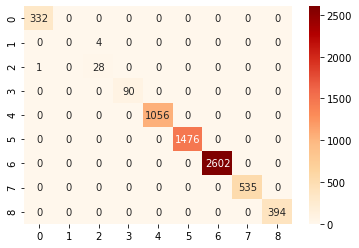

In [284]:
print('\nCLASSIFICATION REPORT')
print(classification_report(testY,clf.predict(testX)))

confusion = confusion_matrix(testY,clf.predict(testX))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(confusion, annot = True,fmt='d',cmap="OrRd")

In [285]:
clf = XGBClassifier(n_estimators = 3000,
#                        
                       random_state=1,
                       )
clf.fit(trainX, trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       332
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00        29
           4       0.99      1.00      0.99        90
           5       1.00      1.00      1.00      1056
           6       1.00      1.00      1.00      1476
           7       1.00      1.00      1.00      2602
           8       1.00      1.00      1.00       535
           9       1.00      1.00      1.00       394

    accuracy                           1.00      6518
   macro avg       1.00      0.97      0.98      6518
weighted avg       1.00      1.00      1.00      6518


CONFUSION MATRIX


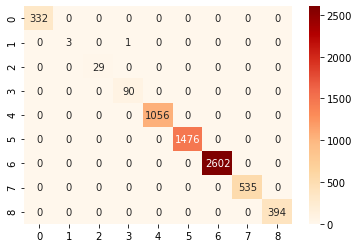

In [287]:
print('\nCLASSIFICATION REPORT')
print(classification_report(testY,clf.predict(testX)))

confusion = confusion_matrix(testY,clf.predict(testX))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(confusion, annot = True,fmt='d',cmap="OrRd")

### Conclusion:
    - The model was overfitting When the outliers were present in the data. training score - 99% and testing_score - 55%
    - When the Outliers got removed the model  is performing very well. training as well as testing accuracy is more than 99%
    
    Hence we suggest to go with removing outliers and making log transformation to make the data normally distributed.Then the result is very good
    
    ML algo's with 99% accuracy - Catboost and XGboost

In [289]:
from joblib import dump
dump(clf, filename='Catboost model.joblib')

['Catboost model.joblib']